Erreur sur ../data/fm_on_snowpacks/F1/13GHz_farside_b_0_v_30deg.txt : unsupported operand type(s) for -: 'float' and 'NoneType'
Erreur sur ../data/fm_on_snowpacks/F1/17GHz_farside_undisturbed_b_0_v_30deg.txt : unsupported operand type(s) for -: 'float' and 'NoneType'


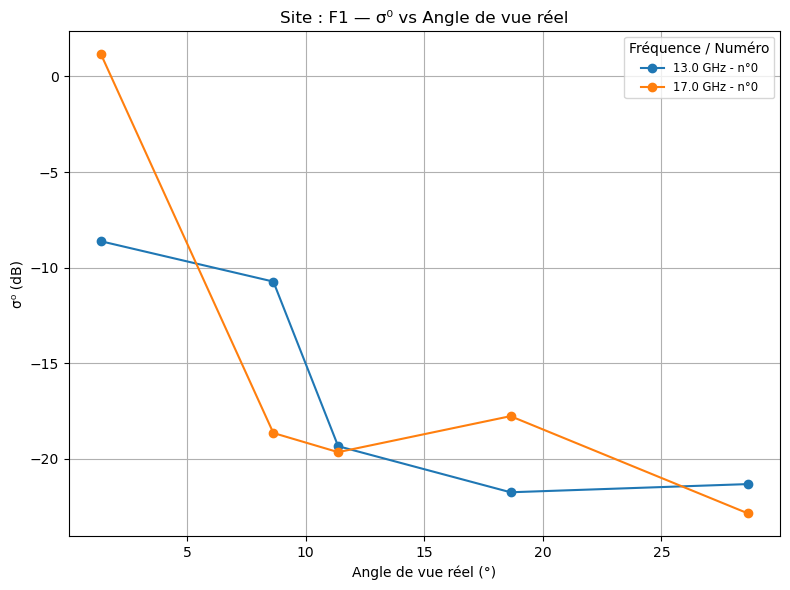

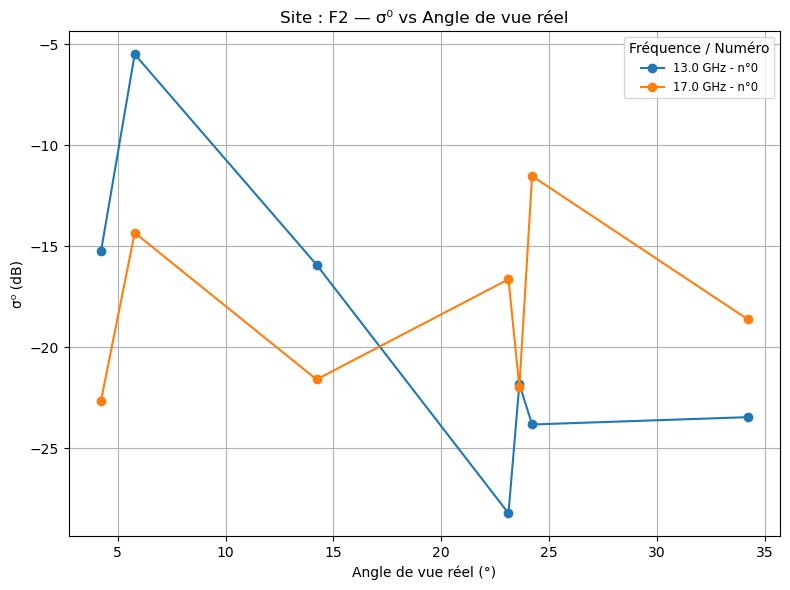

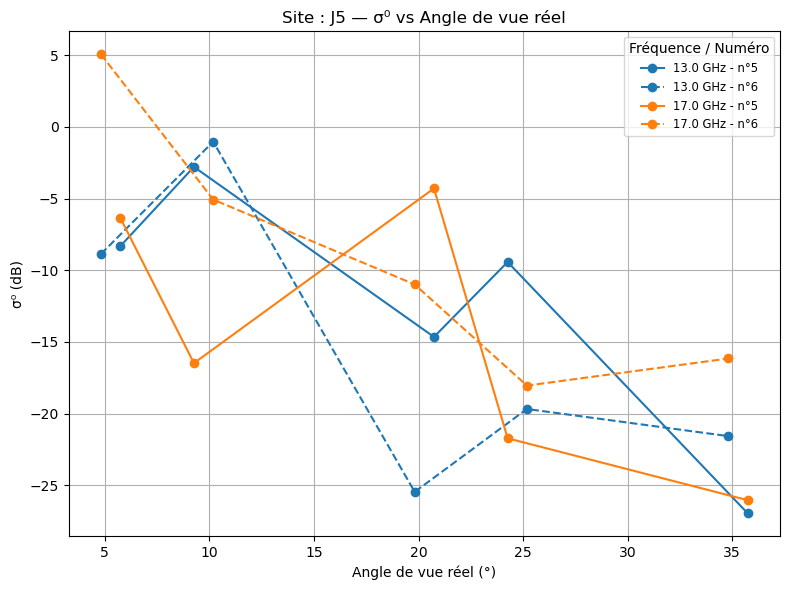

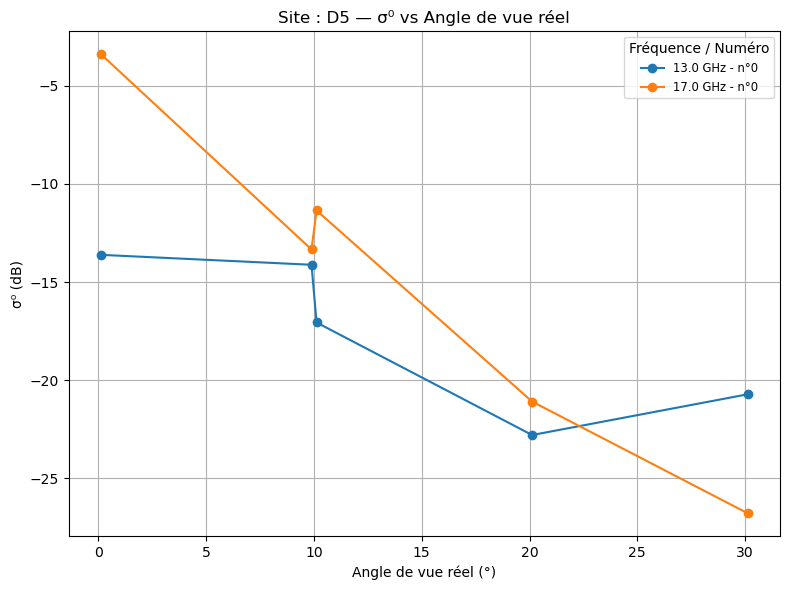

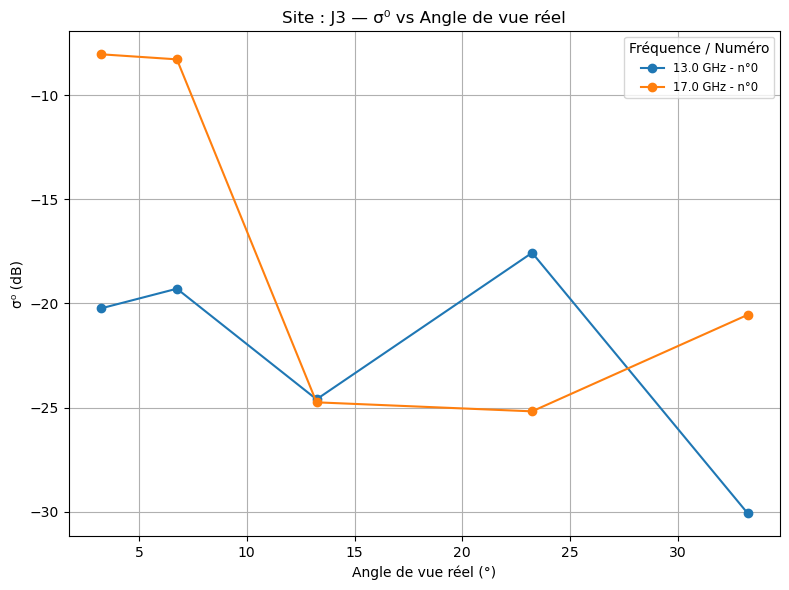

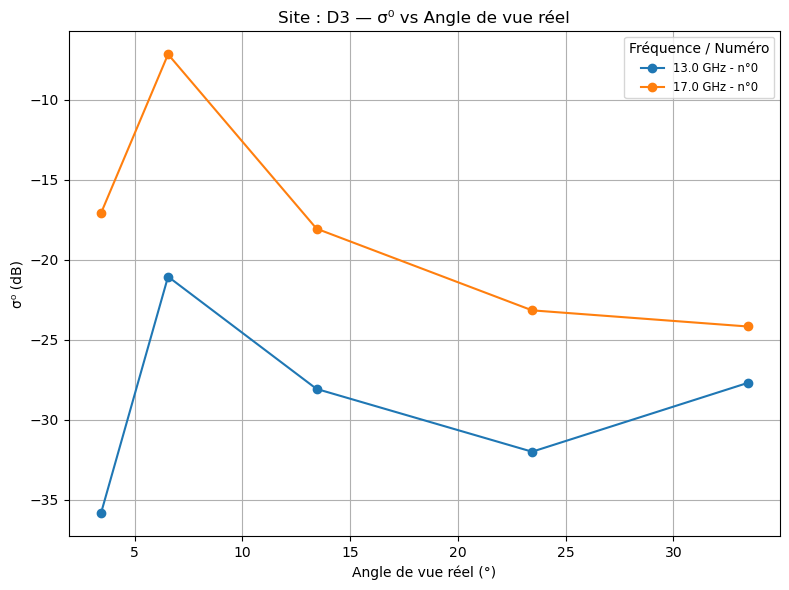

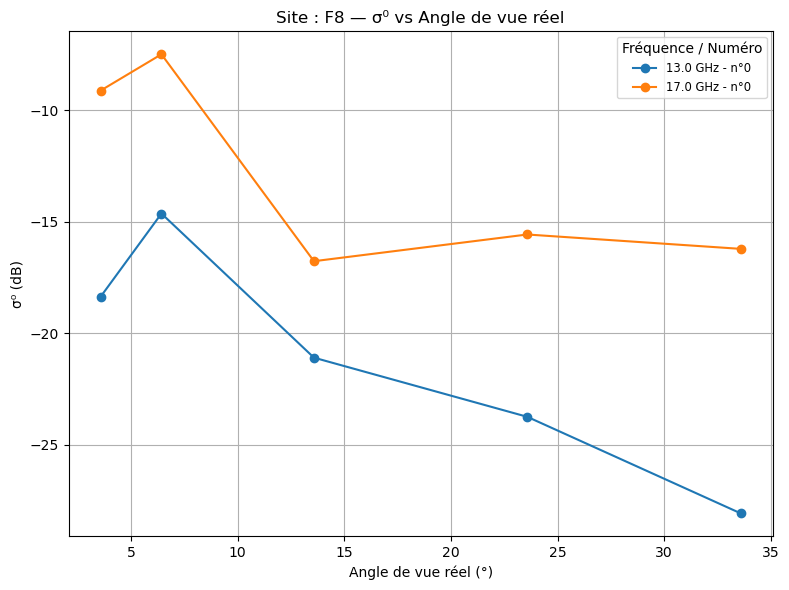

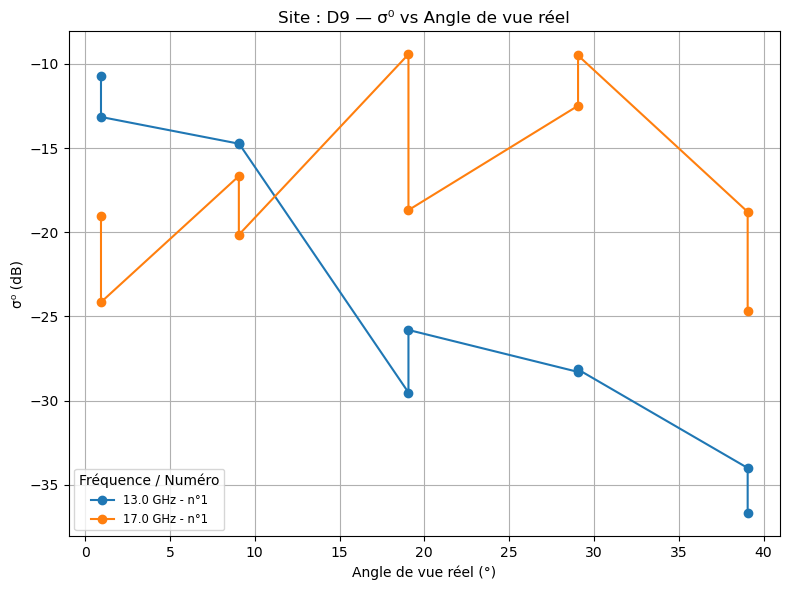

Aucune mesure valide dans ../data/fm_on_snowpacks/D8


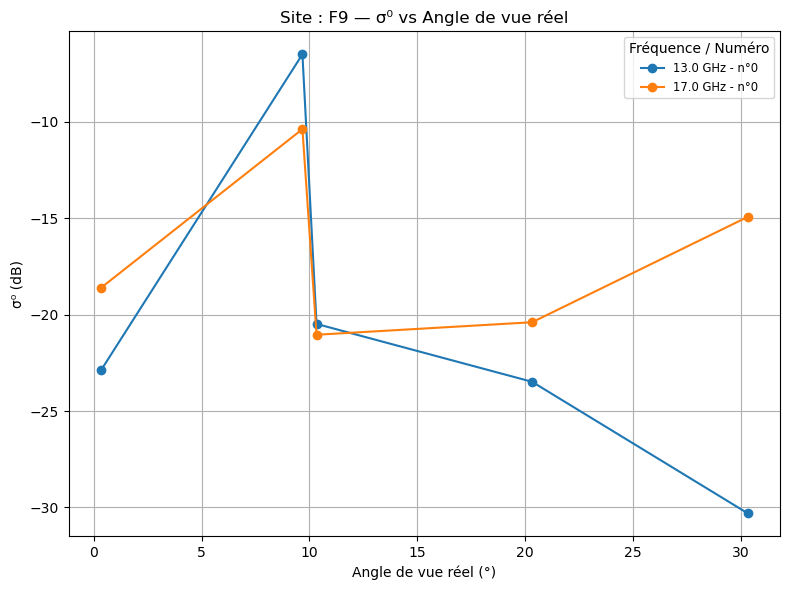

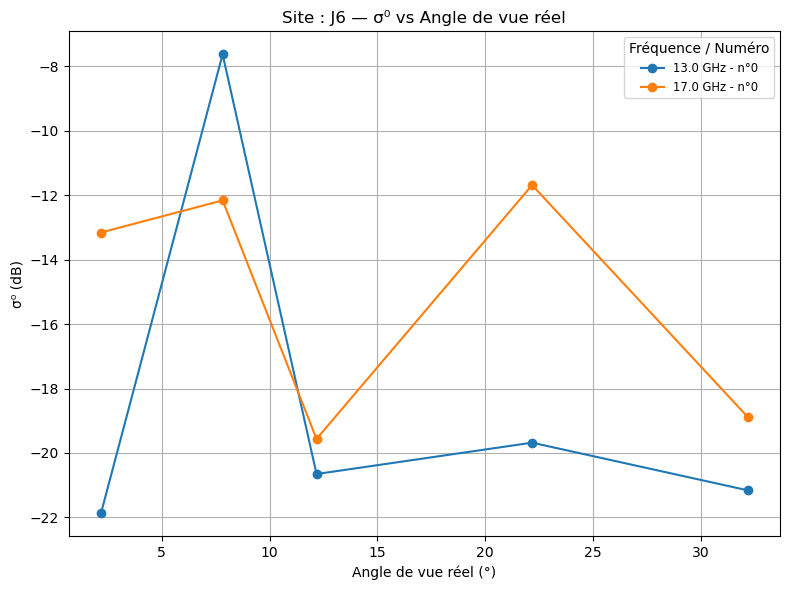

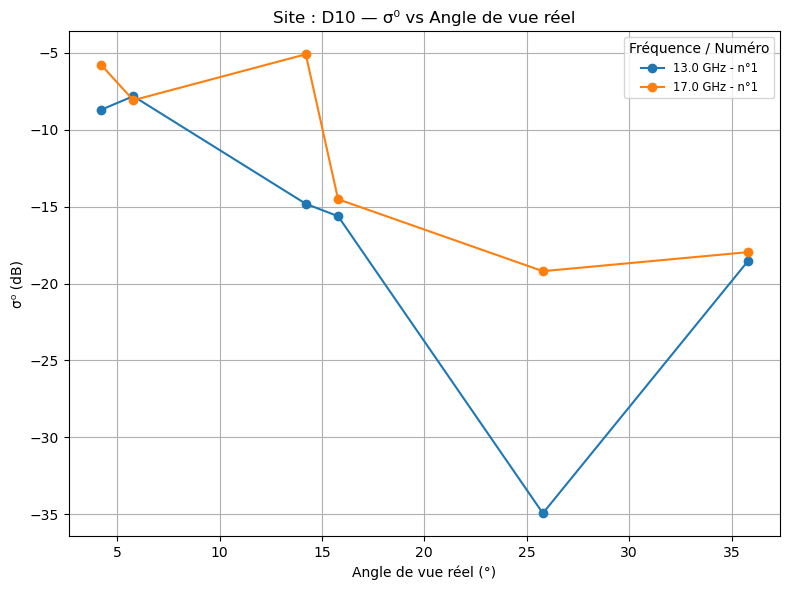

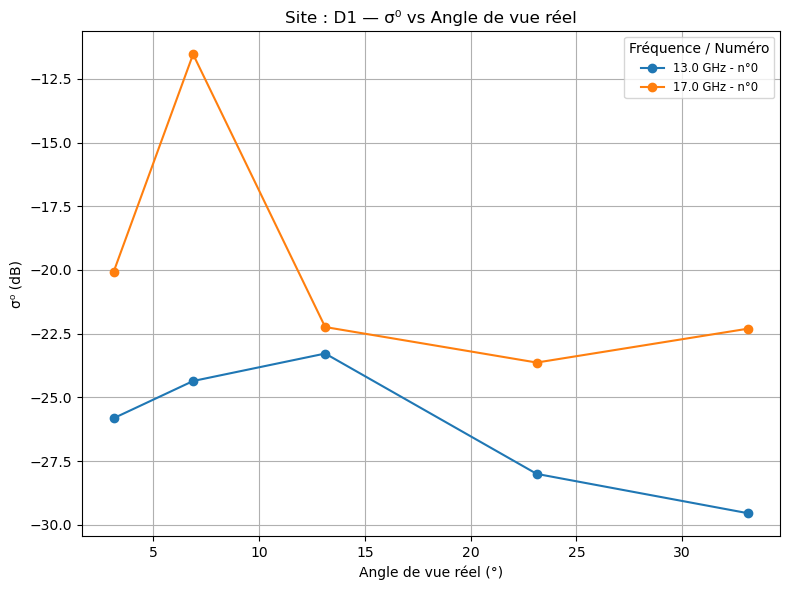

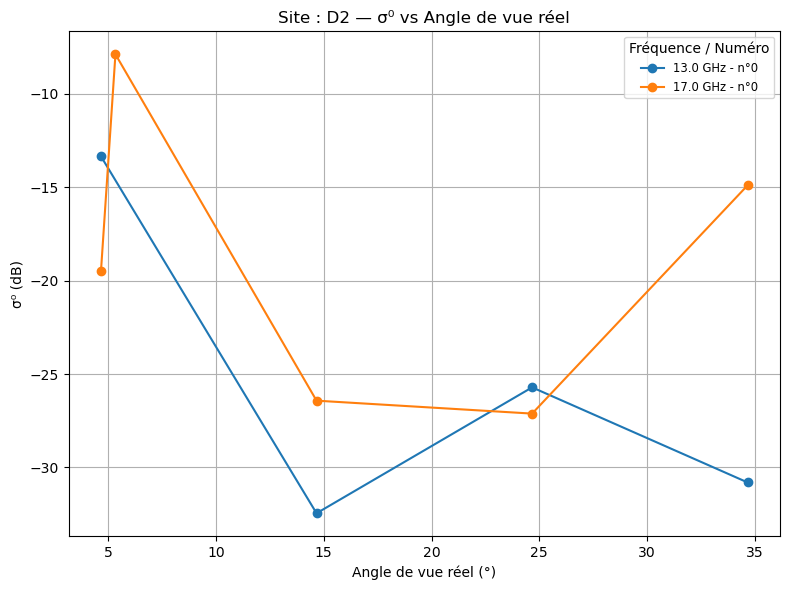

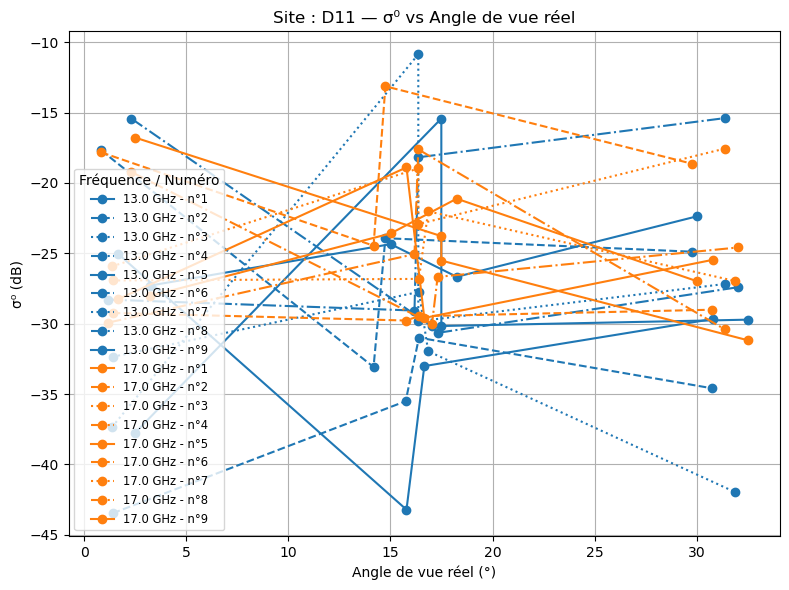

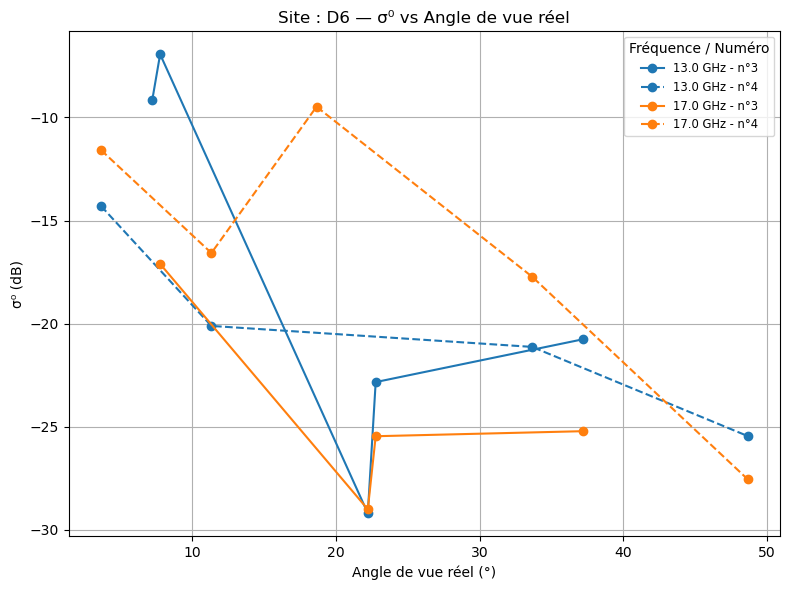

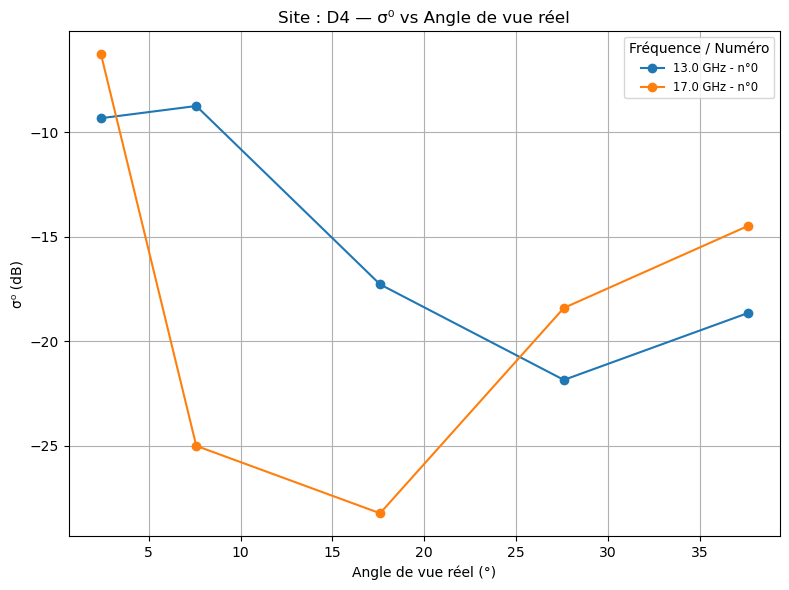

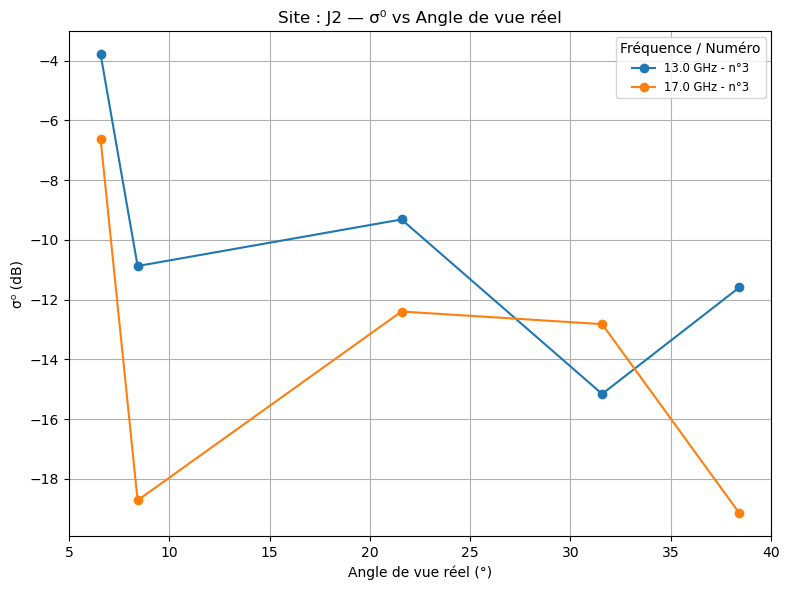

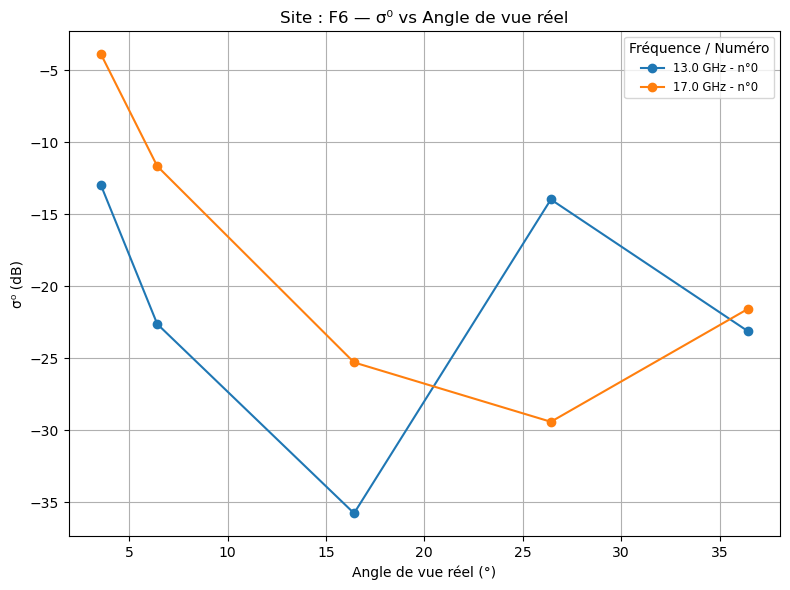

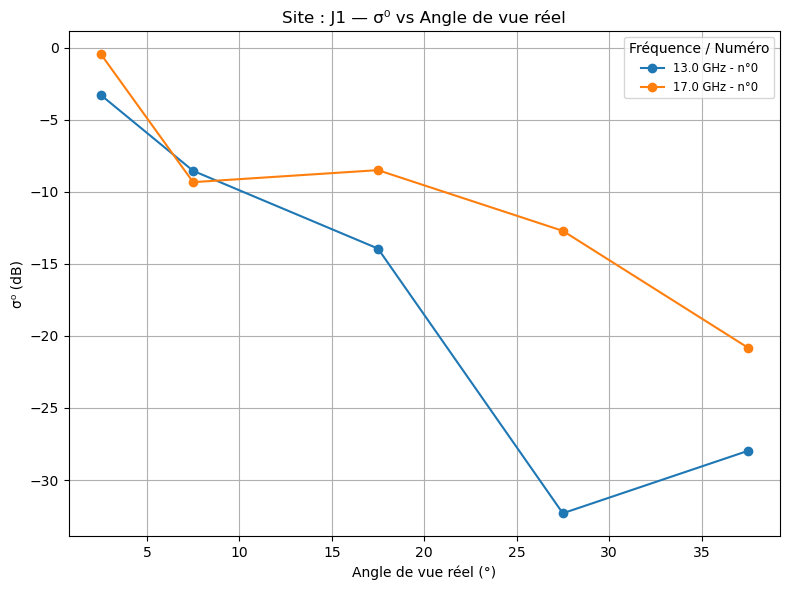

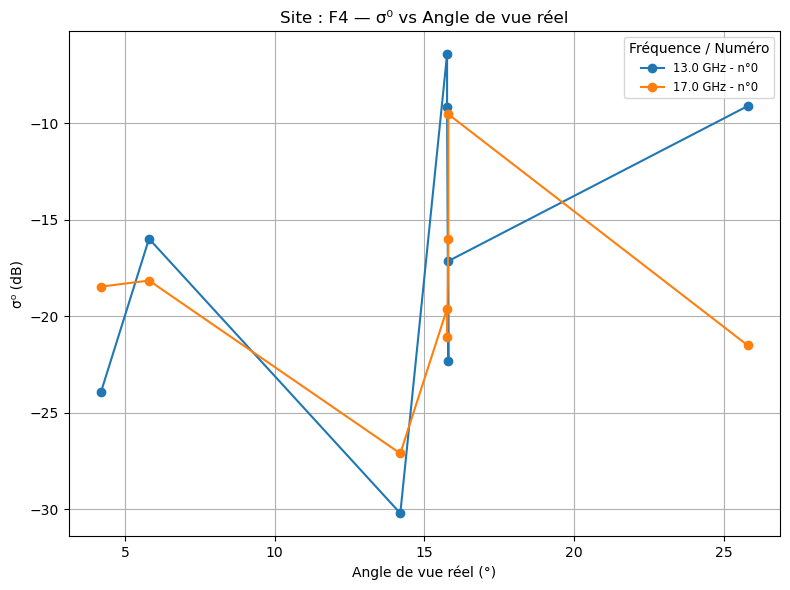

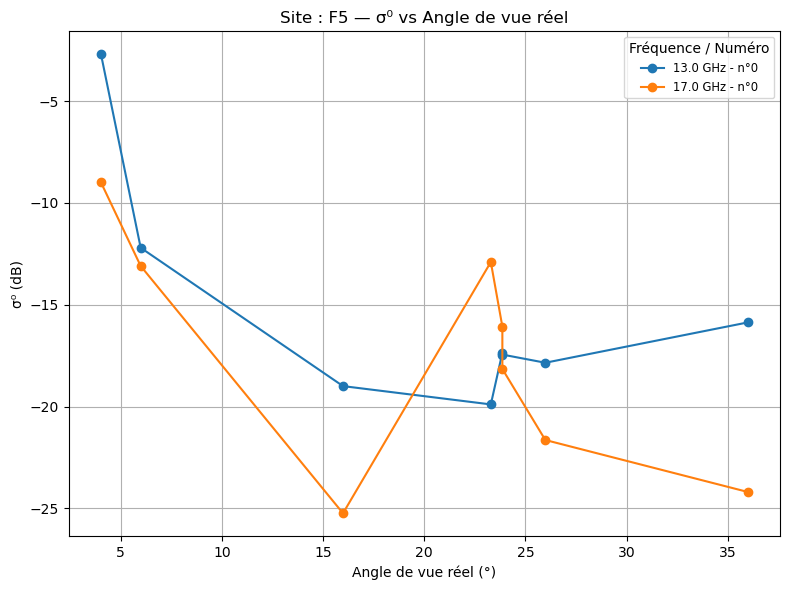

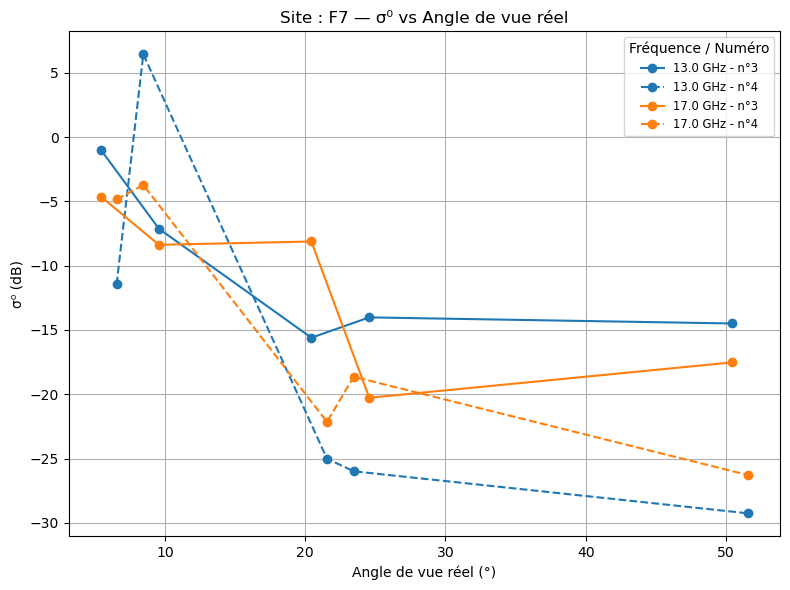

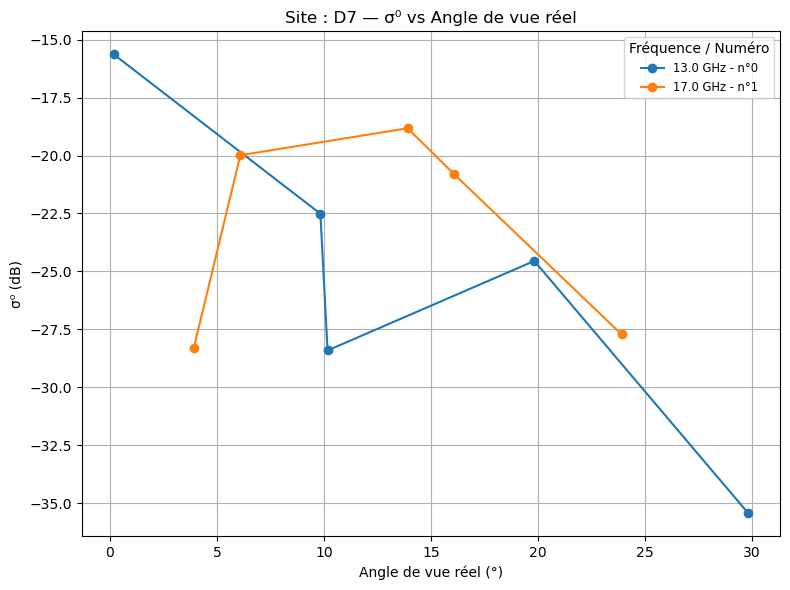

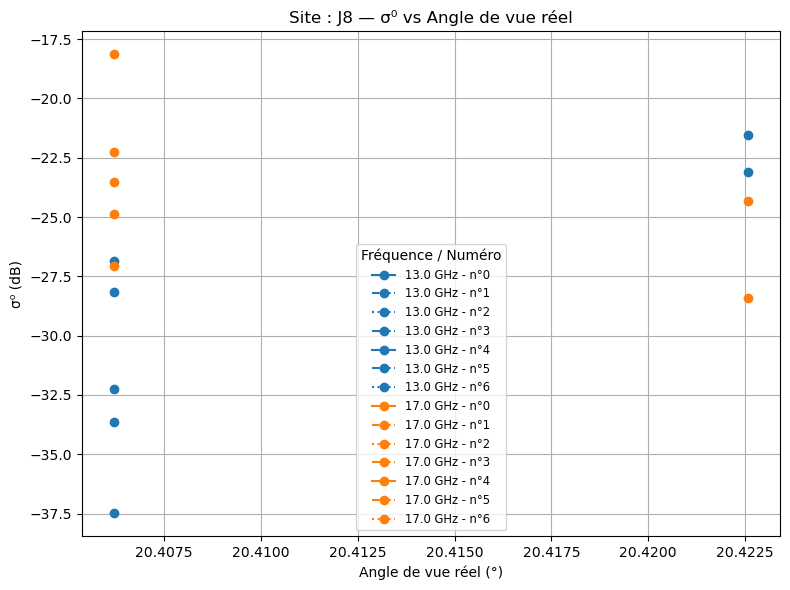

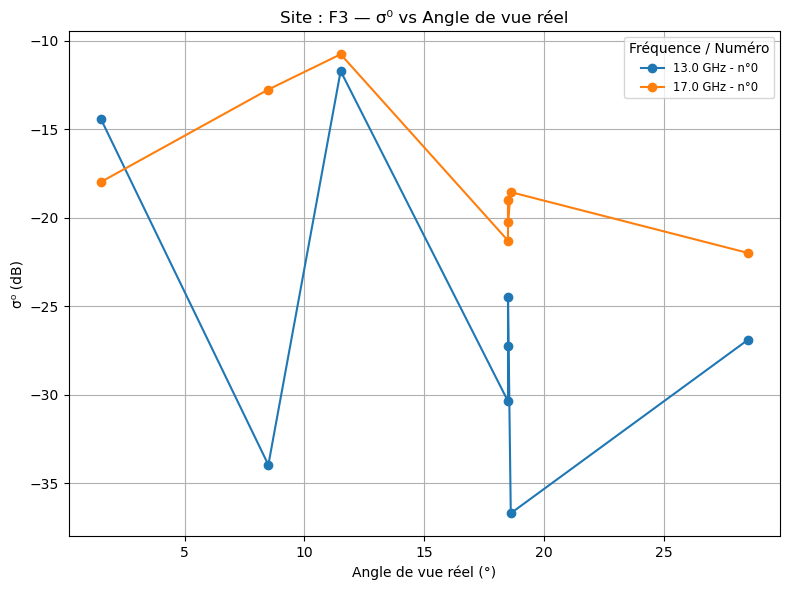

In [1]:
from radar import RadarMesure
import matplotlib.pyplot as plt
import glob
import pandas as pd
import numpy as np
import os

pits = glob.glob('../data/fm_on_snowpacks/*')
os.makedirs('../results', exist_ok=True)

for pit in pits:
    mesures = glob.glob(pit + '/*')
    data = []

    for mesure_path in mesures:
        try:
            met = RadarMesure(mesure_path)
            data.append((met.frequence, met.angle_local, met.pente, met.numero, met.sigma0))
        except Exception as e:
            print(f"Erreur sur {mesure_path} : {e}")
            continue

    if not data:
        print(f"Aucune mesure valide dans {pit}")
        continue

    df = pd.DataFrame(data, columns=['frequence', 'angle_local', 'pente', 'numero', 'sigma0'])
    df['angle_vue_reel'] = np.abs(df['angle_local'] - df['pente'])  # ✅ angle réel
    site_name = os.path.basename(pit)

    # Enregistre les données brutes
    df.to_csv(f'../results/sigma0_raw_{site_name}.csv', index=False)

    # === PLOT ===
    plt.figure(figsize=(8, 6))
    colors = {13: 'tab:blue', 17: 'tab:orange'}
    linestyles = ['-', '--', ':', '-.']

    for freq, group in df.groupby('frequence'):
        for i, (numero, sub) in enumerate(group.groupby('numero')):
            sub_sorted = sub.sort_values('angle_vue_reel')  # ✅ tri avant tracé
            plt.plot(
                sub_sorted['angle_vue_reel'], sub_sorted['sigma0'],
                color=colors.get(freq, 'gray'),
                linestyle=linestyles[i % len(linestyles)],
                marker='o',
                label=f'{freq:.1f} GHz - n°{numero}'
            )

    plt.title(f'Site : {site_name} — σ⁰ vs Angle de vue réel')
    plt.xlabel('Angle de vue réel (°)')
    plt.ylabel('σ⁰ (dB)')
    plt.legend(title='Fréquence / Numéro', fontsize='small')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [3]:
from radar import RadarMesure
import matplotlib.pyplot as plt
import glob
import pandas as pd
import numpy as np
import os

# Liste des dossiers contenant les profils
pits = glob.glob('../data/fm_on_snowpacks/*')

# Dossier de sortie pour les résultats
os.makedirs('../results', exist_ok=True)

for pit in pits:
    mesures = glob.glob(pit + '/*')
    data = []  # liste pour stocker les tuples (frequence, angle_local, numero, sigma0)
    
    for mesure_path in mesures:
        try:
            met = RadarMesure(mesure_path)  # compute=True par défaut
            data.append((met.frequence, met.angle_local, met.numero, met.sigma0))
        except Exception as e:
            print(f"Erreur sur {mesure_path} : {e}")
            print(met.pente)
            continue




Erreur sur ../data/fm_on_snowpacks/F1/13GHz_farside_b_0_v_30deg.txt : unsupported operand type(s) for -: 'float' and 'NoneType'
11.3659601211548
Erreur sur ../data/fm_on_snowpacks/F1/17GHz_farside_undisturbed_b_0_v_30deg.txt : unsupported operand type(s) for -: 'float' and 'NoneType'
11.3659601211548
Erreur sur ../data/fm_on_snowpacks/F8/17GHz_shrubby_0_v_10deg.txt : unsupported operand type(s) for -: 'float' and 'NoneType'
6.55576753616333
Erreur sur ../data/fm_on_snowpacks/F8/17GHz_shrubby_0_v_0deg.txt : unsupported operand type(s) for -: 'float' and 'NoneType'
6.55576753616333
Erreur sur ../data/fm_on_snowpacks/F8/17GHz_shrubby_0_v_20deg.txt : unsupported operand type(s) for -: 'float' and 'NoneType'
6.55576753616333
Erreur sur ../data/fm_on_snowpacks/F8/13GHz_shrubby_0_v_0deg.txt : unsupported operand type(s) for -: 'float' and 'NoneType'
6.55576753616333
Erreur sur ../data/fm_on_snowpacks/F8/17GHz_shrubby_0_v_40deg.txt : unsupported operand type(s) for -: 'float' and 'NoneType'
6.